In [26]:
import numpy as np
#import matplotlib.pyplot as pl
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation, grid_search
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [2]:
def load_data():
    '''Load the Boston dataset.'''

    boston = datasets.load_boston()
    return boston

city_data = load_data()

### Step 1. Please calculate the following values using the Numpy library

    Size of data?
    Number of features?
    Minimum value?
    Maximum Value?
    Calculate mean?
    Calculate median?
    Calculate standard deviation?

In [3]:
def explore_city_data(city_data):
    '''Calculate the Boston housing statistics.'''
    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data
    

    print housing_features.shape[0]
    print housing_features.shape[1]
    print np.min(housing_prices)
    print np.max(housing_prices)
    print np.mean(housing_prices)
    print np.median(housing_prices)
    print np.std(housing_prices)
    
explore_city_data(city_data)

506
13
5.0
50.0
22.5328063241
21.2
9.18801154528


In [4]:
def split_data(city_data):
    '''Randomly shuffle the sample set. Divide it into training and testing set.'''
    
    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target
    
    	###################################
    	### Step 2. YOUR CODE GOES HERE ###
    	###################################
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                       X, y,test_size=0.4, random_state=0)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(city_data)

In [5]:
def performance_metric(label, prediction):
    '''Calculate and return the appropriate performance metric.'''

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    return  mean_squared_error(label, prediction)

In [27]:
def learning_curve_graph(sizes, train_err, test_err):
    '''Plot training and test error as a function of the training size.'''
    %pylab inline
    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()

Decision Tree with Max Depth: 
1
Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


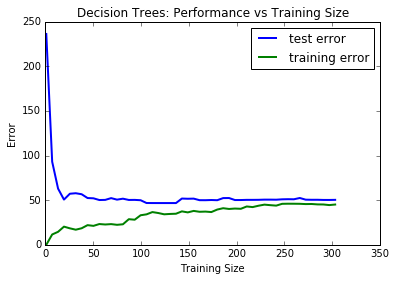

Decision Tree with Max Depth: 
2
Populating the interactive namespace from numpy and matplotlib


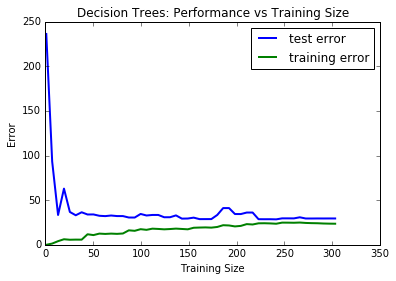

Decision Tree with Max Depth: 
3
Populating the interactive namespace from numpy and matplotlib


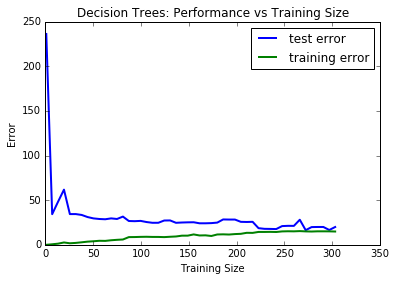

Decision Tree with Max Depth: 
4
Populating the interactive namespace from numpy and matplotlib


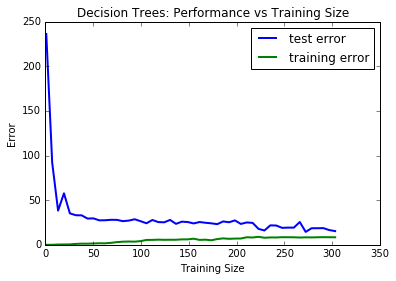

Decision Tree with Max Depth: 
5
Populating the interactive namespace from numpy and matplotlib


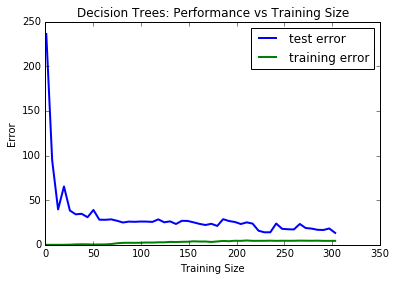

Decision Tree with Max Depth: 
6
Populating the interactive namespace from numpy and matplotlib


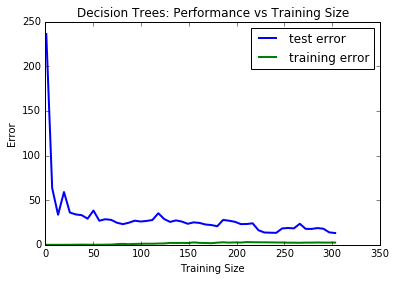

Decision Tree with Max Depth: 
7
Populating the interactive namespace from numpy and matplotlib


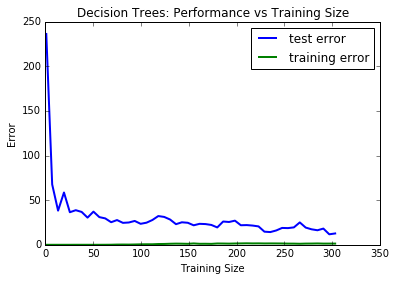

Decision Tree with Max Depth: 
8
Populating the interactive namespace from numpy and matplotlib


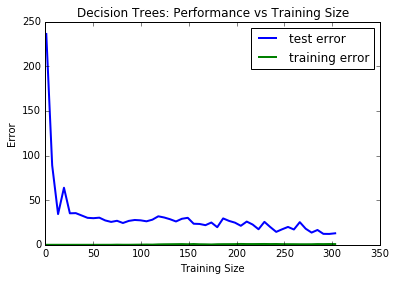

Decision Tree with Max Depth: 
9
Populating the interactive namespace from numpy and matplotlib


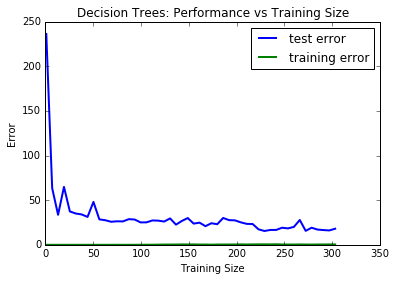

Decision Tree with Max Depth: 
10
Populating the interactive namespace from numpy and matplotlib


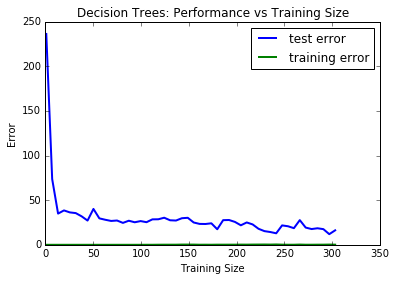

In [28]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
	'''Calculate the performance of the model after a set of training data.'''

	# We will vary the training set size so that we have 50 different sizes
	sizes = np.linspace(1, len(X_train), 50)
	train_err = np.zeros(len(sizes))
	test_err = np.zeros(len(sizes))

	print "Decision Tree with Max Depth: "
	print depth

	for i, s in enumerate(sizes):
      # Create and fit the decision tree regressor model
          regressor = DecisionTreeRegressor(max_depth=depth)
          regressor.fit(X_train[:s], y_train[:s])
       # Find the performance on the training and testing set
          train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
          test_err[i] = performance_metric(y_test, regressor.predict(X_test))

	# Plot learning curve graph
	learning_curve_graph(sizes, train_err, test_err)
    
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

In [30]:
def model_complexity_graph(max_depth, train_err, test_err):
    '''Plot training and test error as a function of the depth of the decision tree learn.'''
    %pylab inline
    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()

Model Complexity: 
Populating the interactive namespace from numpy and matplotlib


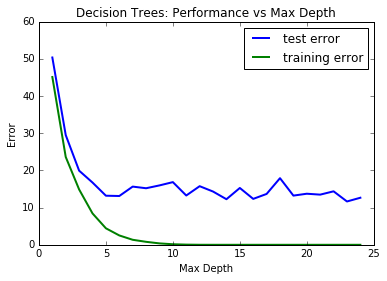

In [31]:
def model_complexity(X_train, y_train, X_test, y_test):
	'''Calculate the performance of the model as model complexity increases.'''

	print "Model Complexity: "

	# We will vary the depth of decision trees from 2 to 25
	max_depth = np.arange(1, 25)
	train_err = np.zeros(len(max_depth))
	test_err = np.zeros(len(max_depth))

	for i, d in enumerate(max_depth):
		# Setup a Decision Tree Regressor so that it learns a tree with depth d
		regressor = DecisionTreeRegressor(max_depth=d)

		# Fit the learner to the training data
		regressor.fit(X_train, y_train)

		# Find the performance on the training set
		train_err[i] = performance_metric(y_train, regressor.predict(X_train))

		# Find the performance on the testing set
		test_err[i] = performance_metric(y_test, regressor.predict(X_test))

	# Plot the model complexity graph
	model_complexity_graph(max_depth, train_err, test_err)
    
model_complexity(X_train, y_train, X_test, y_test)

In [32]:
def fit_predict_model(city_data):
    '''Find and tune the optimal model. Make a prediction on housing data.'''
    
    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target
    
    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()
    
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    
    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################
    
    # 1. Find the best performance metric
    # should be the same as your performance_metric procedure
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    mse = make_scorer(performance_metric, greater_is_better=False)
    # 2. Use gridearch to fine tune the Decision Tree Regressor and find the best model
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = grid_search.GridSearchCV(regressor, parameters, mse)
    # Fit the learner to the training data
    print "Final Model: "
    print reg.fit(X, y)
    
    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)
    print "Best Estimator:   "+ str(reg.best_estimator_)
    
fit_predict_model(city_data)

Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(performance_metric, greater_is_better=False),
       verbose=0)
House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 20.76598639]
Best Estimator:   DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
